<a href="https://colab.research.google.com/github/FSalteri/IDS_example.py-NEW/blob/main/IDS_example.py.NEWCOPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
dataset_url = "https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv"
df = pd.read_csv(dataset_url)

In [36]:
print("Dataset shape:", df.shape)
print("Column names:", df.columns)
print("Sample data:")
print(df.head())

Dataset shape: (14967, 26)
Column names: Index(['Avg_syn_flag', 'Avg_urg_flag', 'Avg_fin_flag', 'Avg_ack_flag',
       'Avg_psh_flag', 'Avg_rst_flag', 'Avg_DNS_pkt', 'Avg_TCP_pkt',
       'Avg_UDP_pkt', 'Avg_ICMP_pkt', 'Duration_window_flow', 'Avg_delta_time',
       'Min_delta_time', 'Max_delta_time', 'StDev_delta_time',
       'Avg_pkts_lenght', 'Min_pkts_lenght', 'Max_pkts_lenght',
       'StDev_pkts_lenght', 'Avg_small_payload_pkt', 'Avg_payload',
       'Min_payload', 'Max_payload', 'StDev_payload', 'Avg_DNS_over_TCP',
       'target'],
      dtype='object')
Sample data:
   Avg_syn_flag  Avg_urg_flag  Avg_fin_flag  Avg_ack_flag  Avg_psh_flag  \
0     -0.230455      4.523595     -1.276876      0.814947     -0.016410   
1     -2.088776      2.387204      0.338205      1.419440      0.114833   
2     -0.043220      3.578791     -1.073984      0.313930     -1.774397   
3      0.065305      3.761012      1.174174      0.761965      0.857883   
4      3.875263      1.385111     -2.63311

In [37]:
target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

In [38]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [41]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(enumerate(class_weights))


In [42]:
model = Sequential([ Dense(128, activation='relu', input_shape=(X_train.shape[1],)),Dropout(0.3),Dense(64, activation='relu'),Dropout(0.3),
                    Dense(y_categorical.shape[1], activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)]

In [45]:
history = model.fit( X_train, y_train, validation_data=(X_test, y_test),epochs=100,batch_size=32,class_weight=class_weight_dict,callbacks=callbacks, verbose=1)

Epoch 1/100
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.7338

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6955 - loss: 0.7285 - val_accuracy: 0.8771 - val_loss: 0.4363
Epoch 2/100
365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.4663

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.4657 - val_accuracy: 0.8925 - val_loss: 0.4028
Epoch 3/100
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8845 - loss: 0.4240

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8845 - loss: 0.4240 - val_accuracy: 0.8941 - val_loss: 0.3958
Epoch 4/100
367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: 0.3997

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.4000 - val_accuracy: 0.9035 - val_loss: 0.3826
Epoch 5/100
362/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.4008

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.4005 - val_accuracy: 0.9061 - val_loss: 0.3755
Epoch 6/100
362/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3858

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.3858 - val_accuracy: 0.9078 - val_loss: 0.3650
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9123 - loss: 0.3554 - val_accuracy: 0.9081 - val_loss: 0.3670
Epoch 8/100
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.3734

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9053 - loss: 0.3733 - val_accuracy: 0.9098 - val_loss: 0.3611
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9127 - loss: 0.3535 - val_accuracy: 0.9112 - val_loss: 0.3668
Epoch 10/100
353/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9175 - loss: 0.3406

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.3411 - val_accuracy: 0.9115 - val_loss: 0.3525
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.3543 - val_accuracy: 0.9125 - val_loss: 0.3569
Epoch 12/100
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9172 - loss: 0.3457

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9172 - loss: 0.3458 - val_accuracy: 0.9142 - val_loss: 0.3521
Epoch 13/100
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.3360

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9211 - loss: 0.3361 - val_accuracy: 0.9138 - val_loss: 0.3494
Epoch 14/100
354/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9190 - loss: 0.3422

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9189 - loss: 0.3420 - val_accuracy: 0.9178 - val_loss: 0.3451
Epoch 15/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9203 - loss: 0.3221 - val_accuracy: 0.9165 - val_loss: 0.3491
Epoch 16/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9172 - loss: 0.3328 - val_accuracy: 0.9172 - val_loss: 0.3523
Epoch 17/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9222 - loss: 0.3225 - val_accuracy: 0.9165 - val_loss: 0.3508
Epoch 18/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9201 - loss: 0.3294 - val_accuracy: 0.9162 - val_loss: 0.3505
Epoch 19/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9241 - loss: 0.3123 - val_accuracy: 0.9168 - val_loss: 0.3478
Epoch 20/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9244 - loss: 0.3131 - val_accuracy: 0.9185 - val_loss: 0.3482
Epoch 21/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9257 - loss: 0.3173 - val_accuracy:

In [46]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
print("Classes:", label_encoder.classes_)
print("Type of classes:", type(label_encoder.classes_))


Classes: [0. 1. 2.]
Type of classes: <class 'numpy.ndarray'>


In [48]:
target_names = [str(cls) for cls in label_encoder.classes_]
print("Fixed target names:", target_names)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))


Fixed target names: ['0.0', '1.0', '2.0']
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1012
         1.0       0.92      0.92      0.92       996
         2.0       0.91      0.93      0.92       986

    accuracy                           0.92      2994
   macro avg       0.92      0.92      0.92      2994
weighted avg       0.92      0.92      0.92      2994



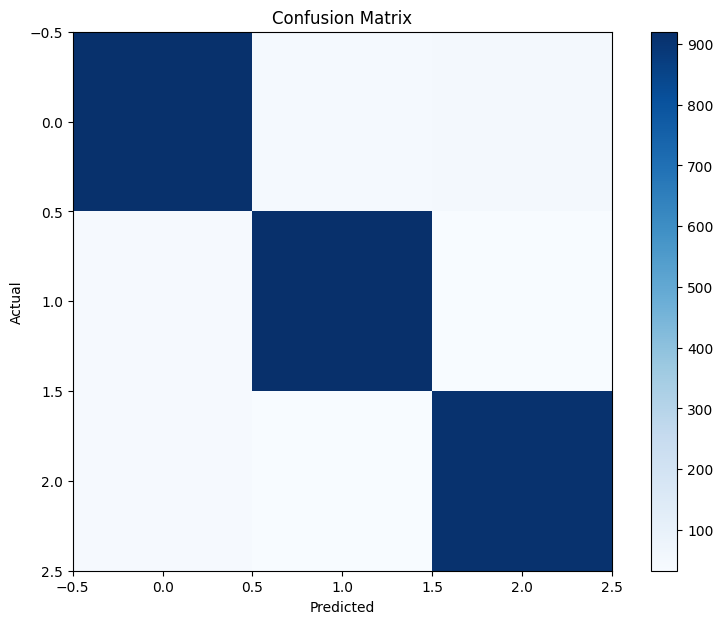

In [49]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()